In [109]:
### DO NOT ALTER OR RUN REPEATEDLY ###
import numpy as np
from math import log10, floor
import pandas as pd

def round_sig(x, sig=2):
       return round(x, sig-int(floor(log10(abs(x))))-1)


round_sig(1234243, 3)

data = {
        'delta_t':[],
        'Length(m)':[],
        'mu':[],
        'angle(rad)':[],
        'gravity': [],
        'total_time': [],
        'period_time': [],
        'experiment_period_time': [],
        'Difference': []
        
}
df = pd.DataFrame(data)




### DO NOT ALTER OR RUN REPEATEDLY ###

In [73]:
g = 9.80665 #Gravity to 4 significant figures
L = 0.48 #Adjust the length here in meters
mu = 0.0000 #The air resistance coefficient.
THETA_0 = np.pi/6 #45 DEGREES

In [110]:
def period_time_length(delta_t,L,mu,THETA_0,g,t):
    
    
    def get_theta_double_dot(theta,theta_dot,g,L,mu):
        return -mu * theta_dot**2 - (g / L)*np.sin(theta)

    period_count = []
    time_count = 0
    old_time = 0
    theta = THETA_0
    theta_dot = 0
    for time in np.arange(0, t, delta_t):
        time_count += delta_t
        theta_double_dot = get_theta_double_dot(theta, theta_dot,g,L,mu)
        theta += theta_dot * delta_t
        previous_theta_dot = theta_dot
        theta_dot += theta_double_dot * delta_t
        
        if previous_theta_dot > 0 and theta_dot < 0: 
            period_count += [time_count - old_time]
            old_time = time_count
    
    target = {
            0.48: 1.4282,
            0.38: 1.2994,
            0.35: 1.2122,
            0.27: 1.0744,
            0.24: 1.0088,
            0.21: 0.9042,
            0.13: 0.7704,
            0.08: 0.5732
    }
            
            
    new_data = {
        'delta_t':[delta_t],
        'Length(m)':[L],
        'mu':[mu],
        'angle(rad)':[THETA_0],
        'gravity': [g],
        'total_time': [t],
        'period_time': [np.mean(period_count)],
        'experiment_period_time': [target[L]],
        'Difference': [target[L]-np.mean(period_count)] 
}
    df2 = pd.DataFrame(new_data)
    global df
    df = df.append(df2)        
    return target[L]-np.mean(period_count)

In [104]:
period_time_length(0.00001,0.08,0.01,np.pi/9,9.80665,10)

0.0013011764822880023

In [113]:
df

,delta_t,Length(m),mu,angle(rad),gravity,total_time,period_time,experiment_period_time,Difference
0,0.00001,0.48,0.0,0.349066,9.80665,10.0,1.400753,1.4282,0.027447
0,0.00001,0.48,0.1,0.349066,9.80665,10.0,1.401597,1.4282,0.026603
0,0.00001,0.48,0.2,0.349066,9.80665,10.0,1.403200,1.4282,0.025000
0,0.00001,0.48,0.3,0.349066,9.80665,10.0,1.405701,1.4282,0.022499
0,0.00001,0.48,0.4,0.349066,9.80665,10.0,1.409284,1.4282,0.018916
...,...,...,...,...,...,...,...,...,...
0,0.00001,0.08,0.5,0.349066,9.80665,10.0,0.577394,0.5732,-0.004194
0,0.00001,0.08,0.6,0.349066,9.80665,10.0,0.580094,0.5732,-0.006894
0,0.00001,0.08,0.7,0.349066,9.80665,10.0,0.583678,0.5732,-0.010478
0,0.00001,0.08,0.8,0.349066,9.80665,10.0,0.588439,0.5732,-0.015239


In [112]:
experiment_lengths = [0.48,0.38,0.35,0.27,0.24,0.21,0.13,0.08]


for length in experiment_lengths:
    difference = 1
    while difference > 0.02:
        for mu2 in range(0,10,1):
            difference = period_time_length(0.00001,length,mu2/10,np.pi/9,9.80665,10)
        

In [117]:
df.describe()

,delta_t,Length(m),mu,angle(rad),gravity,total_time,period_time,experiment_period_time,Difference
count,8.000000e+01,80.000000,80.00000,8.000000e+01,8.000000e+01,80.0,80.000000,80.000000,80.000000
mean,1.000000e-05,0.267500,0.45000,3.490659e-01,9.806650e+00,10.0,1.026662,1.033850,0.007188
std,1.704754e-20,0.124651,0.28904,2.793069e-16,5.362693e-15,0.0,0.260847,0.265893,0.024893
min,1.000000e-05,0.080000,0.00000,3.490659e-01,9.806650e+00,10.0,0.571876,0.573200,-0.059421
25%,1.000000e-05,0.190000,0.20000,3.490659e-01,9.806650e+00,10.0,0.884447,0.870750,-0.008920
50%,1.000000e-05,0.255000,0.45000,3.490659e-01,9.806650e+00,10.0,1.040352,1.041600,0.010327
75%,1.000000e-05,0.357500,0.70000,3.490659e-01,9.806650e+00,10.0,1.244562,1.234000,0.023354
max,1.000000e-05,0.480000,0.90000,3.490659e-01,9.806650e+00,10.0,1.456753,1.428200,0.053068


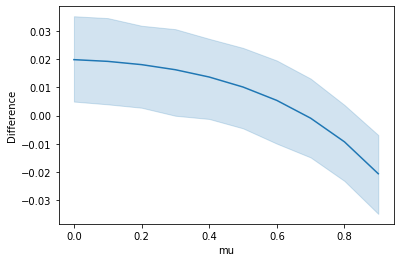

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(data=df,x='mu',y='Difference')